In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8','column 9','column 10','column 11','column 12','column 13','column 14','column 15','column 16','column 17','column 18','column 19','column 20','column 21','column 22','column 23','column 24','column 25','column 26','column 27','column 28','column 29','column 30','column 31','column 32','column 33','column 34',]
df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\incomplete\Incomplete Datasets Without Labels\DERM\DERM_NW_1.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 25,column 26,column 27,column 28,column 29,column 30,column 31,column 32,column 33,column 34
0,1.0,1.0,1,1,1.0,0,0.0,0,2,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,2.0,0
1,1.0,1.0,2,0,0.0,0,3.0,0,3,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,2,2.0,0.0,7
2,2.0,2.0,1,0,0.0,0,3.0,0,2,0.0,...,0.0,0.0,0.0,2.0,0.0,3.0,3,2.0,0.0,7
3,2.0,2.0,2,1,0.0,0,2.0,0,2,2.0,...,0.0,0.0,0.0,2.0,0.0,2.0,2,2.0,0.0,7
4,2.0,2.0,1,0,0.0,0,2.0,0,2,0.0,...,0.0,0.0,0.0,3.0,0.0,2.0,2,2.0,0.0,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
353,2.0,2.0,0,2,1.0,0,0.0,0,0,0.0,...,0.0,0.0,0.0,3.0,0.0,0.0,0,3.0,0.0,70
354,2.0,3.0,2,0,0.0,0,0.0,0,3,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,1.0,0.0,70
355,2.0,2.0,2,1,0.0,0,0.0,0,0,0.0,...,0.0,0.0,0.0,2.0,0.0,0.0,0,2.0,0.0,70
356,2.0,1.0,0,3,0.0,0,0.0,0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,1.0,0.0,70


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
float64		column 1	6
float64		column 2	3
int64		column 3	0
int64		column 4	0
float64		column 5	3
int64		column 6	0
float64		column 7	3
int64		column 8	0
int64		column 9	0
float64		column 10	6
int64		column 11	0
float64		column 12	3
float64		column 13	3
float64		column 14	3
int64		column 15	0
float64		column 16	6
float64		column 17	3
float64		column 18	3
float64		column 19	3
float64		column 20	3
float64		column 21	3
float64		column 22	6
float64		column 23	3
int64		column 24	0
float64		column 25	3
float64		column 26	6
float64		column 27	3
float64		column 28	3
float64		column 29	6
float64		column 30	3
int64		column 31	0
float64		column 32	6
float64		column 33	6
int64		column 34	0


In [4]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 25,column 26,column 27,column 28,column 29,column 30,column 31,column 32,column 33,column 34
count,352.000000,355.000000,358.000000,358.000000,355.00000,358.000000,355.000000,358.000000,358.000000,352.000000,...,355.000000,352.000000,355.000000,355.000000,352.000000,355.000000,358.000000,352.000000,352.000000,358.000000
mean,2.079545,1.814085,1.569832,1.354749,0.63662,0.449721,0.171831,0.379888,0.622905,0.525568,...,0.402817,0.463068,0.456338,0.949296,0.448864,0.107042,0.117318,1.869318,0.559659,36.296089
std,0.653225,0.700544,0.900909,1.135062,0.90841,0.956468,0.578617,0.837388,0.990278,0.911731,...,0.859308,0.866469,0.953840,1.126325,0.956429,0.457000,0.493863,0.691809,1.107791,15.324557
min,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,25.000000
50%,2.000000,2.000000,2.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,35.000000
75%,2.000000,2.000000,2.000000,2.000000,1.00000,0.000000,0.000000,0.000000,1.000000,1.000000,...,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,2.000000,0.000000,49.750000
max,3.000000,3.000000,3.000000,3.000000,3.00000,3.000000,3.000000,3.000000,3.000000,3.000000,...,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,75.000000


<AxesSubplot:>

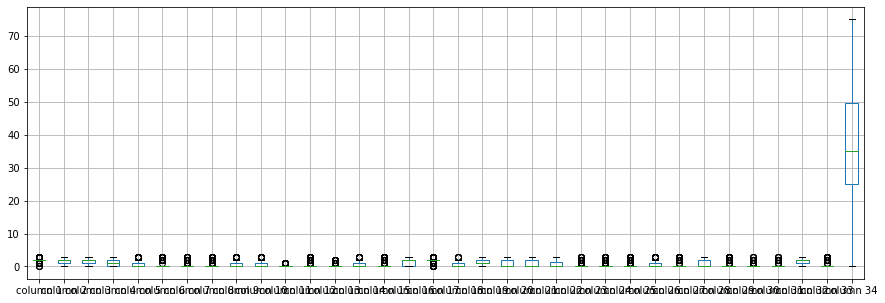

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:
df.mean()

column 1      2.079545
column 2      1.814085
column 3      1.569832
column 4      1.354749
column 5      0.636620
column 6      0.449721
column 7      0.171831
column 8      0.379888
column 9      0.622905
column 10     0.525568
column 11     0.122905
column 12     0.414085
column 13     0.143662
column 14     0.549296
column 15     0.315642
column 16     1.372159
column 17     1.957746
column 18     0.504225
column 19     1.281690
column 20     0.661972
column 21     0.977465
column 22     0.639205
column 23     0.292958
column 24     0.368715
column 25     0.402817
column 26     0.463068
column 27     0.456338
column 28     0.949296
column 29     0.448864
column 30     0.107042
column 31     0.117318
column 32     1.869318
column 33     0.559659
column 34    36.296089
dtype: float64

In [7]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 25,column 26,column 27,column 28,column 29,column 30,column 31,column 32,column 33,column 34
column 1,1.000000,0.420765,0.250979,-0.041264,-0.002767,0.011454,-0.102043,-0.060206,0.164613,0.216512,...,-0.039740,0.156078,-0.023727,0.016293,-0.028674,-0.007946,0.005774,0.094355,-0.029736,-0.007511
column 2,0.420765,1.000000,0.352995,-0.081765,-0.024432,-0.080124,-0.088911,-0.089822,0.305674,0.305671,...,-0.091594,0.223097,-0.123339,0.011132,-0.121387,-0.001342,-0.004678,-0.021450,-0.146541,0.009334
column 3,0.250979,0.352995,1.000000,-0.058534,0.240971,0.322657,-0.175393,0.280341,0.301187,0.261809,...,0.285650,0.347233,0.283232,-0.263764,0.265075,-0.091997,-0.131788,0.115007,0.267838,0.138493
column 4,-0.041264,-0.081765,-0.058534,1.000000,0.278493,0.412525,-0.143164,0.361761,-0.296824,-0.159083,...,0.370937,-0.191626,0.366120,0.003168,0.375697,-0.178131,-0.184385,0.038028,0.387898,0.048053
column 5,-0.002767,-0.024432,0.240971,0.278493,1.000000,0.382957,-0.173279,0.381979,-0.060144,0.016845,...,0.391901,-0.008792,0.362206,0.002404,0.369685,-0.147493,-0.163731,0.093123,0.362627,0.076905
column 6,0.011454,-0.080124,0.322657,0.412525,0.382957,1.000000,-0.138211,0.863269,-0.278843,-0.255768,...,0.884338,-0.118007,0.909699,0.091903,0.894154,-0.097002,-0.112007,0.239779,0.902467,0.096953
column 7,-0.102043,-0.088911,-0.175393,-0.143164,-0.173279,-0.138211,1.000000,-0.134461,0.219723,-0.005755,...,-0.121558,-0.161532,-0.141351,0.001312,-0.139190,0.784802,0.844641,-0.091932,-0.133649,-0.370562
column 8,-0.060206,-0.089822,0.280341,0.361761,0.381979,0.863269,-0.134461,1.000000,-0.286160,-0.262346,...,0.885101,-0.105219,0.890074,0.131031,0.870507,-0.083872,-0.108070,0.264413,0.889113,0.111047
column 9,0.164613,0.305674,0.301187,-0.296824,-0.060144,-0.278843,0.219723,-0.286160,1.000000,0.654363,...,-0.274262,0.479706,-0.283554,-0.422250,-0.281611,0.233009,0.256811,-0.073888,-0.279133,-0.078267
column 10,0.216512,0.305671,0.261809,-0.159083,0.016845,-0.255768,-0.005755,-0.262346,0.654363,1.000000,...,-0.261841,0.462245,-0.253938,-0.423842,-0.258302,-0.053076,-0.019294,0.030067,-0.251603,0.044509


In [8]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [14]:
imputer = md.Midas(layer_structure = [34,34+13,34+13+13,34+13+13+13,34+13+13+13+13,34+13+13+13+13+13,34+13+13+13+13+13+13,34+13+13+13+13+13+13+13,34+13+13+13+13+13+13,34+13+13+13+13+13,34+13+13+13+13,34+13+13+13,34+13+13,34+13,34], vae_layer = False, seed = 13)
imputer.build_model(df)
imputer.train_model(training_epochs=100)


Size index: [34]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 76.65526754205877
Epoch: 1 , loss: 76.27082269841975
Epoch: 2 , loss: 76.14904507723722
Epoch: 3 , loss: 76.00087391246448
Epoch: 4 , loss: 76.07606575705789
Epoch: 5 , loss: 75.69548866965555
Epoch: 6 , loss: 75.96566113558683
Epoch: 7 , loss: 75.66242564808239
Epoch: 8 , loss: 75.30070703679866
Epoch: 9 , loss: 74.35212117975408
Epoch: 10 , loss: 71.73680426857688
Epoch: 11 , loss: 69.13478435169567
Epoch: 12 , loss: 68.35800448330966
Epoch: 13 , loss: 67.21849233453923
Epoch: 14 , loss: 66.89719668301669
Epoch: 15 , loss: 66.9256803339178
Epoch: 16 , loss: 66.5065992528742
Epoch: 17 , loss: 66.20193099975586
Epoch: 18 , loss: 65.72550184076482
Epoch: 19 , loss: 65.85540598089045
Epoch: 20 , loss: 65.61246871948242
Epoch: 21 , loss: 65.30386612632059
Epoch: 22 , loss: 65.02870837124911
Epoch: 23 , loss: 65.14691508900036
Epoch: 24 , loss: 64.79725733670321
Epoch: 25 , loss: 65.00305279818448
Epoch: 2

In [15]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(358, 34)

In [16]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1      2.0
column 2      1.0
column 3      1.0
column 4      1.0
column 5      0.0
column 6      0.0
column 7      2.0
column 8      0.0
column 9      3.0
column 10     2.0
column 11     0.0
column 12     0.0
column 13     0.0
column 14     1.0
column 15     0.0
column 16     1.0
column 17     1.0
column 18     1.0
column 19     1.0
column 20     0.0
column 21     0.0
column 22     0.0
column 23     0.0
column 24     0.0
column 25     0.0
column 26     0.0
column 27     0.0
column 28     0.0
column 29     0.0
column 30     0.0
column 31     1.0
column 32     1.0
column 33     1.0
column 34    12.0
Name: 21, dtype: float64

In [17]:
complete_df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\complete\Original Datasets Without Labels\DERM.xlsx', header=None,names=column_names)

In [18]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 25,column 26,column 27,column 28,column 29,column 30,column 31,column 32,column 33,column 34
0,0.0,0.0,0,0,0.0,0,0.0,0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0
1,0.0,0.0,0,0,0.0,0,0.0,0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0
2,0.0,0.0,0,0,0.0,0,0.0,0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0
3,0.0,0.0,0,0,0.0,0,0.0,0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0
4,0.0,0.0,0,0,0.0,0,0.0,0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
353,0.0,0.0,0,0,0.0,0,0.0,0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0
354,0.0,0.0,0,0,0.0,0,0.0,0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0
355,0.0,0.0,0,0,0.0,0,0.0,0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0
356,0.0,0.0,0,0,0.0,0,0.0,0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0


Calculating NRMSE Value

In [19]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [20]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [21]:
numerator=Frobenius_norm(new_df-complete_df)
denominator=Frobenius_norm(complete_df)
numerator, denominator

(12.105844431867625, 758.0725558942231)

In [22]:
NRMS=numerator/denominator
NRMS


0.015969242439580946

In [23]:
new_df.iloc[66,:]

column 1      2.0
column 2      0.0
column 3      0.0
column 4      3.0
column 5      0.0
column 6      0.0
column 7      0.0
column 8      0.0
column 9      0.0
column 10     0.0
column 11     0.0
column 12     0.0
column 13     0.0
column 14     0.0
column 15     2.0
column 16     2.0
column 17     2.0
column 18     0.0
column 19     0.0
column 20     0.0
column 21     3.0
column 22     0.0
column 23     0.0
column 24     0.0
column 25     0.0
column 26     0.0
column 27     0.0
column 28     0.0
column 29     0.0
column 30     0.0
column 31     0.0
column 32     2.0
column 33     0.0
column 34    22.0
Name: 66, dtype: float64

In [24]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 25,column 26,column 27,column 28,column 29,column 30,column 31,column 32,column 33,column 34
0,1.0,1.0,1,1,1.0,0,0.0,0,2,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,2.0,0
1,1.0,1.0,2,0,0.0,0,3.0,0,3,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,2,2.0,0.0,7
2,2.0,2.0,1,0,0.0,0,3.0,0,2,0.0,...,0.0,0.0,0.0,2.0,0.0,3.0,3,2.0,0.0,7
3,2.0,2.0,2,1,0.0,0,2.0,0,2,2.0,...,0.0,0.0,0.0,2.0,0.0,2.0,2,2.0,0.0,7
4,2.0,2.0,1,0,0.0,0,2.0,0,2,0.0,...,0.0,0.0,0.0,3.0,0.0,2.0,2,2.0,0.0,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
353,2.0,2.0,0,2,1.0,0,0.0,0,0,0.0,...,0.0,0.0,0.0,3.0,0.0,0.0,0,3.0,0.0,70
354,2.0,3.0,2,0,0.0,0,0.0,0,3,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,1.0,0.0,70
355,2.0,2.0,2,1,0.0,0,0.0,0,0,0.0,...,0.0,0.0,0.0,2.0,0.0,0.0,0,2.0,0.0,70
356,2.0,1.0,0,3,0.0,0,0.0,0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,1.0,0.0,70


In [25]:
imputations[-1].to_excel("DERM_NW_1(imp).xlsx", index=False, header=False)